# House Price Prediction Model

**We all know that a house price is a number from some defined assortment, so obviously prediction of prices of houses is a regression task. To forecast house prices one person usually tries to locate similar properties in his or her neighborhood and based on collected data that person will try to predict the house price.**

**All these indicate that house price prediction is an emerging research area of regression that requires the knowledge of machine learning. This has motivated me to work in this domain.**

In [6]:
import numpy as np
import pandas as pd

In [7]:
house = pd.read_csv('Living_House_Data.csv')

In [99]:
house.head()

Reg_ID      Date     Price  Bedrooms  Bathrooms  Sqft_Living  Sqft_Lot  \
0  1000102  10012000  221900.0         3       1.00         1180      5650   
1  1000102  10012000  538000.0         3       2.25         2570      7242   
2  1200019  11012000  180000.0         2       1.00          770     10000   
3  1200021  11012000  604000.0         4       3.00         1960      5000   
4  2800031  12012000  510000.0         3       2.00         1680      8080   

   Floors  WaterFront  View  ...  Grade  Sqft_Above  Sqft_Basement  Yr_Built  \
0     1.0           0     0  ...      7        1180              0      1955   
1     2.0           0     0  ...      7        2170            400      1951   
2     1.0           0     0  ...      6         770              0      1933   
3     1.0           0     0  ...      7        1050            910      1965   
4     1.0           0     0  ...      8        1680              0      1987   

   Yr_Renovated  ZipCode  Latitude  Longitude  Sqft_Living15  Sqft_Lot15  
0             0    98178   47.5112   -122.257           1340        5650  
1          1991    98125   47.7210   -122.319           1690        7639  
2             0    98028   47.7379   -122.233           2720        8062  
3             0    98136   47.5208   -122.393           1360        5000  
4             0    98074   47.6168   -122.045           1800        7503  

[5 rows x 21 columns]

In [100]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Reg_ID         21613 non-null  int64  
 1   Date           21613 non-null  int64  
 2   Price          21613 non-null  float64
 3   Bedrooms       21613 non-null  int64  
 4   Bathrooms      21613 non-null  float64
 5   Sqft_Living    21613 non-null  int64  
 6   Sqft_Lot       21613 non-null  int64  
 7   Floors         21613 non-null  float64
 8   WaterFront     21613 non-null  int64  
 9   View           21613 non-null  int64  
 10  Condition      21613 non-null  int64  
 11  Grade          21613 non-null  int64  
 12  Sqft_Above     21613 non-null  int64  
 13  Sqft_Basement  21613 non-null  int64  
 14  Yr_Built       21613 non-null  int64  
 15  Yr_Renovated   21613 non-null  int64  
 16  ZipCode        21613 non-null  int64  
 17  Latitude       21613 non-null  float64
 18  Longit

In [101]:
house.describe()

Reg_ID          Date         Price      Bedrooms     Bathrooms  \
count  2.161300e+04  2.161300e+04  2.161300e+04  21613.000000  21613.000000   
mean   4.580302e+09  1.581269e+07  5.401822e+05      3.370842      2.114757   
std    2.876566e+09  8.801791e+06  3.673622e+05      0.930062      0.770163   
min    1.000102e+06  1.012001e+06  7.500000e+04      0.000000      0.000000   
25%    2.123049e+09  8.082011e+06  3.219500e+05      3.000000      1.750000   
50%    3.904930e+09  1.604200e+07  4.500000e+05      3.000000      2.250000   
75%    7.308900e+09  2.311200e+07  6.450000e+05      4.000000      2.500000   
max    9.900000e+09  3.112202e+07  7.700000e+06     33.000000      8.000000   

        Sqft_Living      Sqft_Lot        Floors    WaterFront          View  \
count  21613.000000  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean    2079.899736  1.510697e+04      1.494309      0.007542      0.234303   
std      918.440897  4.142051e+04      0.539989      0.086517      0.766318   
min      290.000000  5.200000e+02      1.000000      0.000000      0.000000   
25%     1427.000000  5.040000e+03      1.000000      0.000000      0.000000   
50%     1910.000000  7.618000e+03      1.500000      0.000000      0.000000   
75%     2550.000000  1.068800e+04      2.000000      0.000000      0.000000   
max    13540.000000  1.651359e+06      3.500000      1.000000      4.000000   

       ...         Grade    Sqft_Above  Sqft_Basement      Yr_Built  \
count  ...  21613.000000  21613.000000   21613.000000  21613.000000   
mean   ...      7.656873   1788.390691     291.509045   1971.005136   
std    ...      1.175459    828.090978     442.575043     29.373411   
min    ...      1.000000    290.000000       0.000000   1900.000000   
25%    ...      7.000000   1190.000000       0.000000   1951.000000   
50%    ...      7.000000   1560.000000       0.000000   1975.000000   
75%    ...      8.000000   2210.000000     560.000000   1997.000000   
max    ...     13.000000   9410.000000    4820.000000   2015.000000   

       Yr_Renovated       ZipCode      Latitude     Longitude  Sqft_Living15  \
count  21613.000000  21613.000000  21613.000000  21613.000000   21613.000000   
mean      84.402258  98077.939805     47.560053   -122.213896    1986.552492   
std      401.679240     53.505026      0.138564      0.140828     685.391304   
min        0.000000  98001.000000     47.155900   -122.519000     399.000000   
25%        0.000000  98033.000000     47.471000   -122.328000    1490.000000   
50%        0.000000  98065.000000     47.571800   -122.230000    1840.000000   
75%        0.000000  98118.000000     47.678000   -122.125000    2360.000000   
max     2015.000000  98199.000000     47.777600   -121.315000    6210.000000   

          Sqft_Lot15  
count   21613.000000  
mean    12768.455652  
std     27304.179631  
min       651.000000  
25%      5100.000000  
50%      7620.000000  
75%     10083.000000  
max    871200.000000  

[8 rows x 21 columns]

Text(0, 0.5, 'Count')

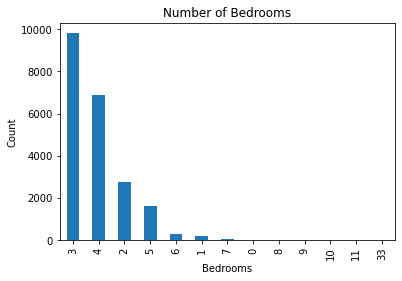

In [21]:
import matplotlib.pyplot as plt
import mpl_toolkits
%matplotlib inline
house['Bedrooms'].value_counts().plot(kind='bar')
plt.title('Number of Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

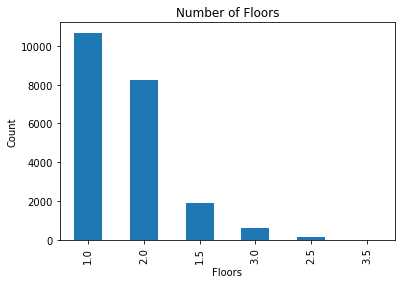

In [209]:
house.Floors.value_counts().plot(kind='bar')
plt.title('Number of Floors')
plt.xlabel('Floors')
plt.ylabel('Count')

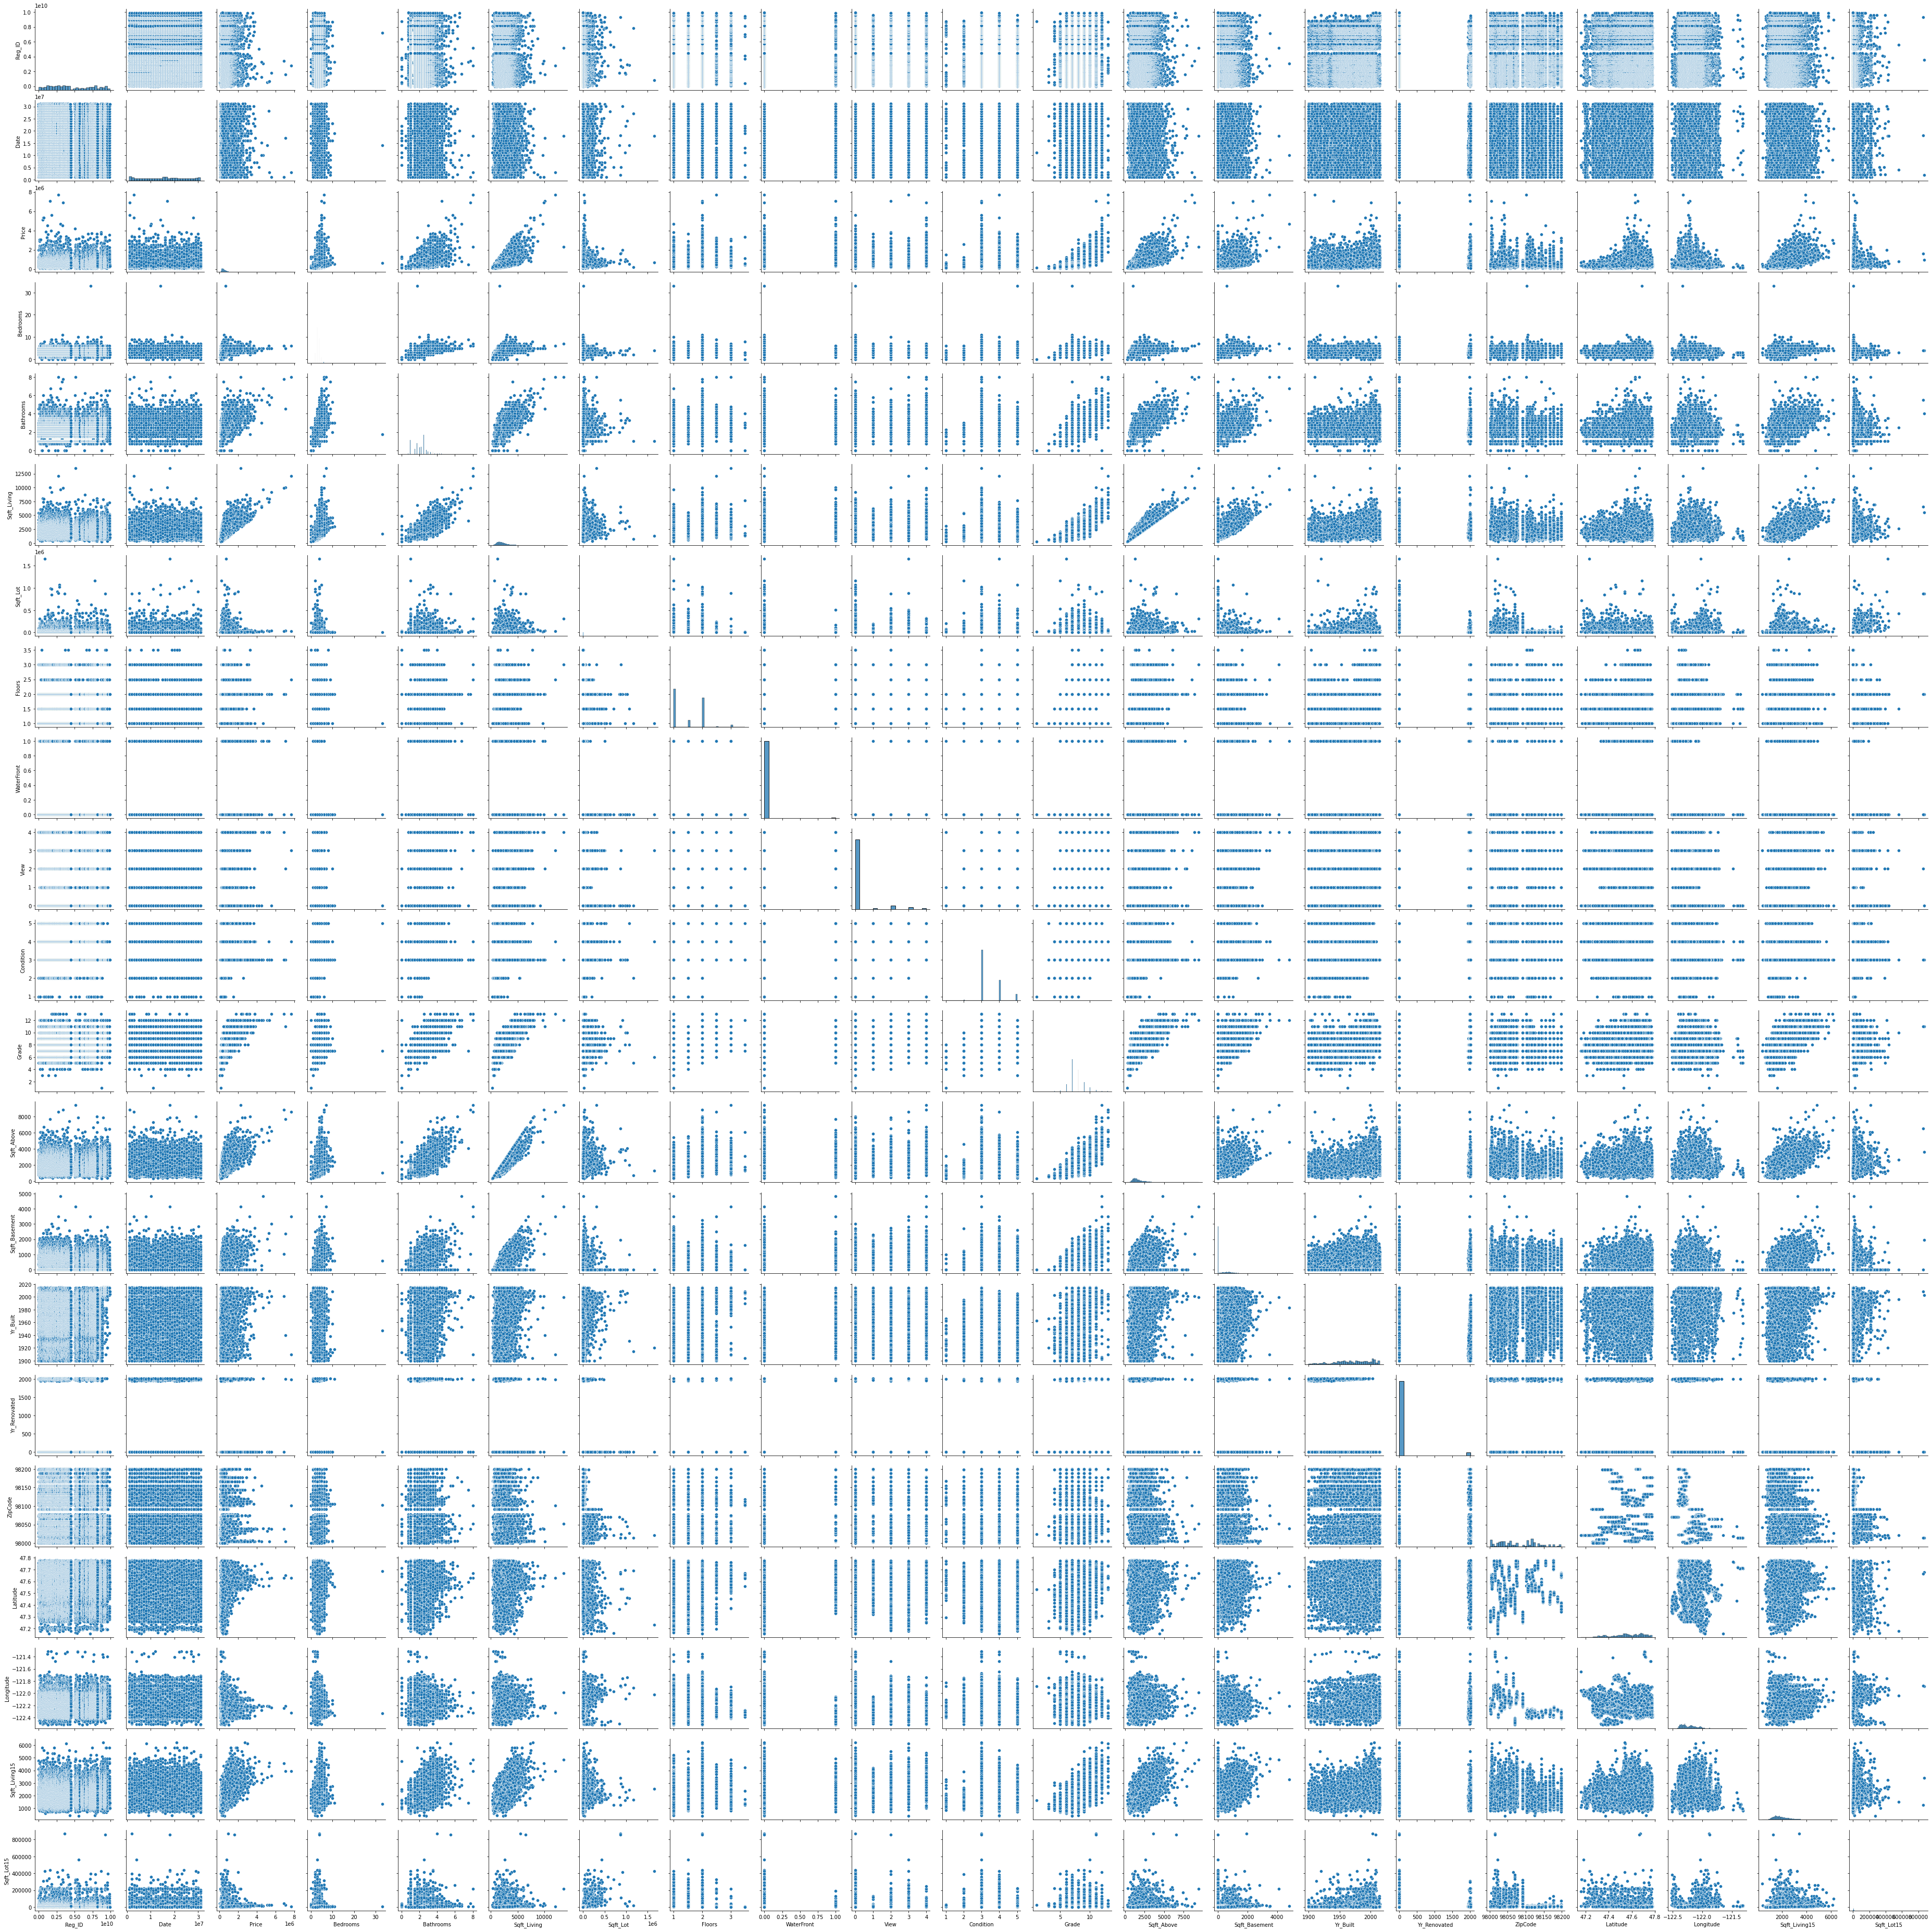

In [78]:
import seaborn as sns
sns.pairplot(house)

D:\Software\lib\site-packages\seaborn\axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


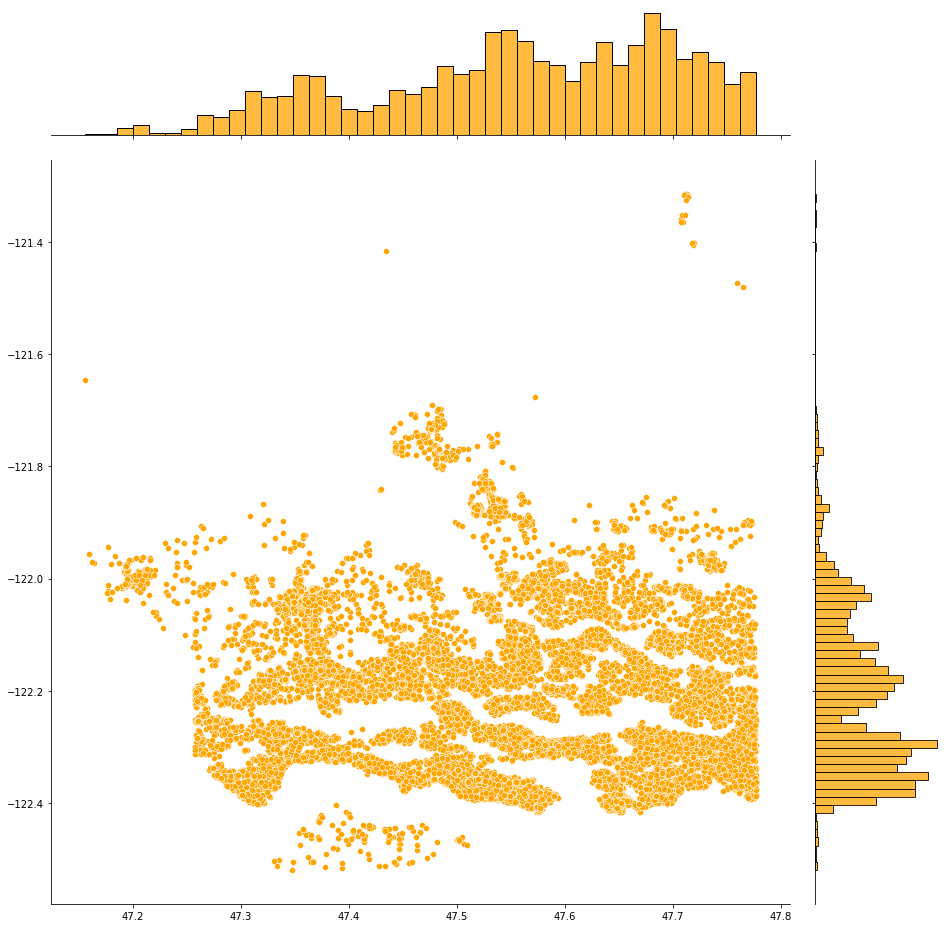

<Figure size 720x720 with 0 Axes>

In [191]:
sns.jointplot(x=house.Latitude.values, y=house.Longitude.values, size=13,color='orange')
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.figure(figsize=(10,10))
plt.show()

Text(0, 0.5, 'Sqft_Living')

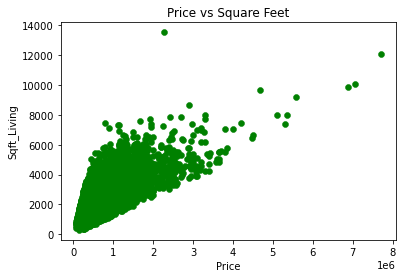

In [196]:
plt.scatter(house.Price,house.Sqft_Living,color='green',linewidth=0.5)
plt.title("Price vs Square Feet")
plt.xlabel('Price')
plt.ylabel('Sqft_Living')

Text(0, 0.5, 'Price')

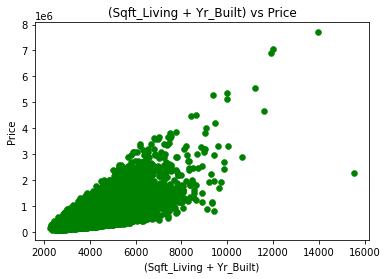

In [201]:
plt.scatter((house['Sqft_Living']+house['Yr_Built']),house['Price'],color='green',linewidth=0.5)
plt.title("(Sqft_Living + Yr_Built) vs Price")
plt.xlabel('(Sqft_Living + Yr_Built)')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

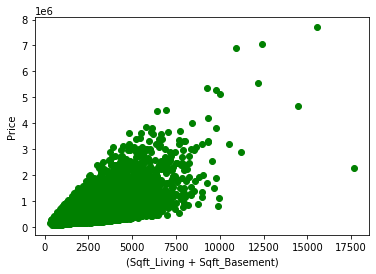

In [202]:
plt.scatter((house['Sqft_Living']+house['Sqft_Basement']),house['Price'],color='green',linewidth=1)
plt.xlabel('(Sqft_Living + Sqft_Basement)')
plt.ylabel('Price')

Text(0, 0.5, 'Latitude')

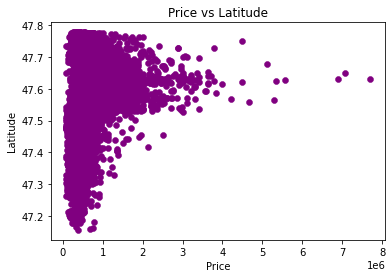

In [203]:
plt.scatter(house.Price,house.Latitude,color='purple',linewidth=0.5)
plt.title("Price vs Latitude")
plt.xlabel('Price')
plt.ylabel('Latitude')

Text(0.5, 1.0, 'Price vs Latitude')

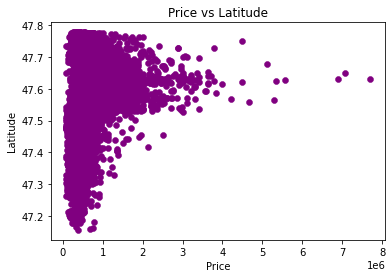

In [184]:
plt.scatter(house.Price,house.Latitude,color='purple',linewidth=0.5)
plt.xlabel("Price")
plt.ylabel('Latitude')
plt.title("Price vs Latitude")

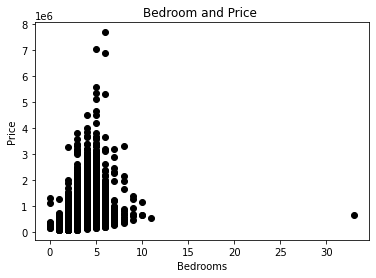

In [204]:
plt.scatter(house.Bedrooms,house.Price,color='black',linewidth=1)
plt.title("Bedroom and Price ")
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.show()

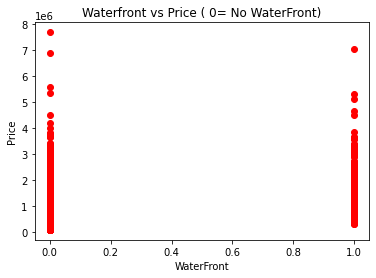

In [206]:
plt.scatter(house.WaterFront,house.Price,color='red',linewidth=1)
plt.title("Waterfront vs Price ( 0= No WaterFront)")
plt.xlabel("WaterFront")
plt.ylabel("Price")
plt.show()

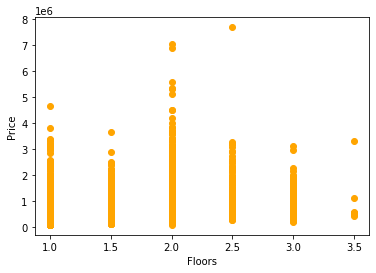

In [207]:
plt.scatter(house.Floors,house.Price,color='orange',linewidth=1)
plt.xlabel("Floors")
plt.ylabel("Price")
plt.show()

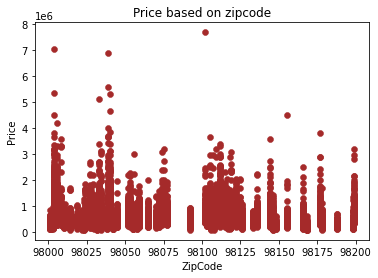

In [208]:
plt.scatter(house.ZipCode,house.Price,color='brown',linewidth=0.5)
plt.title("Price based on zipcode")
plt.xlabel("ZipCode")
plt.ylabel("Price")
plt.show()

In [8]:
train1 = house.drop(['Reg_ID', 'Price'],axis=1)

In [9]:
train1.head()

Date  Bedrooms  Bathrooms  Sqft_Living  Sqft_Lot  Floors  WaterFront  \
0  10012000         3       1.00         1180      5650     1.0           0   
1  10012000         3       2.25         2570      7242     2.0           0   
2  11012000         2       1.00          770     10000     1.0           0   
3  11012000         4       3.00         1960      5000     1.0           0   
4  12012000         3       2.00         1680      8080     1.0           0   

   View  Condition  Grade  Sqft_Above  Sqft_Basement  Yr_Built  Yr_Renovated  \
0     0          3      7        1180              0      1955             0   
1     0          3      7        2170            400      1951          1991   
2     0          3      6         770              0      1933             0   
3     0          5      7        1050            910      1965             0   
4     0          3      8        1680              0      1987             0   

   ZipCode  Latitude  Longitude  Sqft_Living15  Sqft_Lot15  
0    98178   47.5112   -122.257           1340        5650  
1    98125   47.7210   -122.319           1690        7639  
2    98028   47.7379   -122.233           2720        8062  
3    98136   47.5208   -122.393           1360        5000  
4    98074   47.6168   -122.045           1800        7503

In [10]:
#Fitting the simple Linear Regression Model to the training dataset
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [15]:
from sklearn.model_selection import train_test_split
labels = house['Price']

In [16]:
x_train , x_test , y_train , y_test = train_test_split(train1 , labels , test_size = 0.10,random_state =2)

In [17]:
reg.fit(x_train,y_train)

LinearRegression()

In [19]:
#Prediction of Test and Training set result
x_pred=reg.predict(x_train)
y_pred=reg.predict(x_test)

In [24]:
y_test

6638      735000.0
7366     1150000.0
3158      350500.0
9117      860000.0
3392      122000.0
           ...    
3823      294950.0
3268      732000.0
19051     299000.0
1486      229950.0
10955     571000.0
Name: Price, Length: 2162, dtype: float64

In [25]:
from sklearn.metrics import mean_squared_error,r2_score
rscore = r2_score=(y_test,y_pred)
print(rscore)

(6638      735000.0
7366     1150000.0
3158      350500.0
9117      860000.0
3392      122000.0
           ...    
3823      294950.0
3268      732000.0
19051     299000.0
1486      229950.0
10955     571000.0
Name: Price, Length: 2162, dtype: float64, array([ 708914.68470791, 1454184.14170784,  423040.93867767, ...,
        190431.51016045,  238409.69802698,  451571.10625401]))


In [26]:
from sklearn.metrics import mean_squared_error,r2_score
rscore = r2_score(y_test,y_pred)
print(rscore)

0.7320284190597084


In [27]:
reg.score(x_test,y_test)

0.7320284190597084

In [28]:
rmse = (mean_squared_error(y_test,y_pred))**0.5
print(rmse)

197974.65523420094


In [30]:
#Prediction for all the Test Data
y_predict=reg.predict(x_test)
y_predict

array([ 708914.68470791, 1454184.14170784,  423040.93867767, ...,
        190431.51016045,  238409.69802698,  451571.10625401])

In [33]:
#Performance Analysis
from sklearn.metrics import mean_squared_error,r2_score
rscore=r2_score(y_test,y_predict)
print("House Price Prediction Performance Ratio :",(rscore*100).round(),'%')

House Price Prediction Performance Ratio : 73.0 %
